In [1]:
import torch
from torch import nn
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
torch.manual_seed(1)    # reproducible

In [4]:
# Hyper Parameters
EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 64
TIME_STEP = 28          # rnn time step / image height
INPUT_SIZE = 28         # rnn input size / image width
LR = 0.01               # learning rate
DOWNLOAD_MNIST = False   # set to True if haven't download the data

In [5]:
# Mnist digital dataset
train_data = dsets.MNIST(
    root='./mnist/',
    train=True,                         # this is training data
    transform=transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                        # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,            # download it if you don't have it
)

C:\Users\voho0\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])


C:\Users\voho0\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


torch.Size([60000])


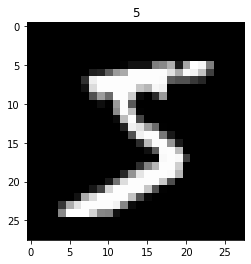

In [6]:
# plot one example
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

In [7]:
# Data Loader for easy mini-batch return in training
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [8]:
# convert test data into Variable, pick 2000 samples to speed up testing
test_data = dsets.MNIST(root='./mnist/', train=False, transform=transforms.ToTensor())
test_x = Variable(test_data.test_data, volatile=True).type(torch.FloatTensor)[:2000]/255.   # shape (2000, 28, 28) value in range(0,1)
test_y = test_data.test_labels.numpy().squeeze()[:2000]    # covert to numpy array

C:\Users\voho0\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\voho0\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\voho0\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [9]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.LSTM(         # if use nn.RNN(), it hardly learns
            input_size=INPUT_SIZE,
            hidden_size=64,         # rnn hidden unit
            num_layers=1,           # number of rnn layer
            batch_first=True,       # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )
        
        self.out = nn.Linear(64, 10)

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)

        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])
        return out

In [10]:
rnn= RNN()
print(rnn)

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [22]:
rnn.parameters()

<generator object Module.parameters at 0x0000021567A41B88>

In [25]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

In [ ]:
# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x.view(-1, 28, 28))
        b_y = Variable(y)
        
        output = rnn(b_x)
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #if step % 50 == 0:
    test_output = rnn(test_x)
    pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
    accuracy = sum(pred_y == test_y) / float(test_y.size)
    # change loss.data[0] to loss.data
    print('Epoch:', epoch, '| train loss: %.4f' % loss.data, '| test accuracy: %.2f' % accuracy)

In [16]:
rnn= RNN2()
print(rnn)

RNN2(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [80]:
# print 10 predictions from test data
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


In [74]:
dir(optimizer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_param_group',
 'defaults',
 'load_state_dict',
 'param_groups',
 'state',
 'state_dict',
 'step',
 'zero_grad']

In [77]:
optimizer.state_dict()

{'state': {2291054341720: {'step': 1878,
   'exp_avg': tensor([[ 3.6278e-12,  4.1817e-06,  4.0920e-06,  ...,  3.0744e-05,
             1.3414e-05, -1.1632e-07],
           [ 3.8676e-12, -3.0790e-06, -6.5824e-06,  ..., -1.4787e-05,
            -7.3598e-06, -3.5706e-07],
           [-1.3810e-12,  1.1944e-06,  1.8385e-06,  ...,  1.4698e-06,
             6.7562e-07, -6.1525e-09],
           ...,
           [-2.0255e-12, -9.6479e-08,  1.3702e-07,  ...,  3.8134e-05,
             2.5417e-05, -2.8400e-06],
           [-9.4034e-12, -9.6676e-09, -5.2665e-09,  ..., -6.8819e-06,
            -1.8574e-07,  1.2610e-06],
           [ 1.6767e-12, -2.9167e-07, -9.9566e-07,  ...,  1.1565e-05,
             7.4689e-06, -3.7486e-07]]),
   'exp_avg_sq': tensor([[4.6032e-13, 4.5745e-10, 1.7050e-08,  ..., 3.0361e-07, 1.6248e-08,
            8.9842e-10],
           [1.0819e-12, 3.0430e-09, 1.4381e-08,  ..., 3.9051e-07, 7.4229e-08,
            1.3093e-09],
           [5.0613e-14, 2.8029e-11, 1.8449e-10,  ..., 3.

In [64]:
test_output[0]

tensor([-2.2791, -0.2592,  0.4535,  0.8568, -1.3332, -2.5419, -5.4411,  9.3892,
         0.0218,  1.9899], grad_fn=<SelectBackward>)

In [67]:
torch.max(test_output, 1)[1].numpy().squeeze()

array([7, 2, 1, ..., 3, 9, 5], dtype=int64)

In [54]:
torch.max(test_output, 1)[1]

tensor([7, 2, 1,  ..., 3, 9, 5])